<a href="https://colab.research.google.com/github/adas754/image2text/blob/main/trocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

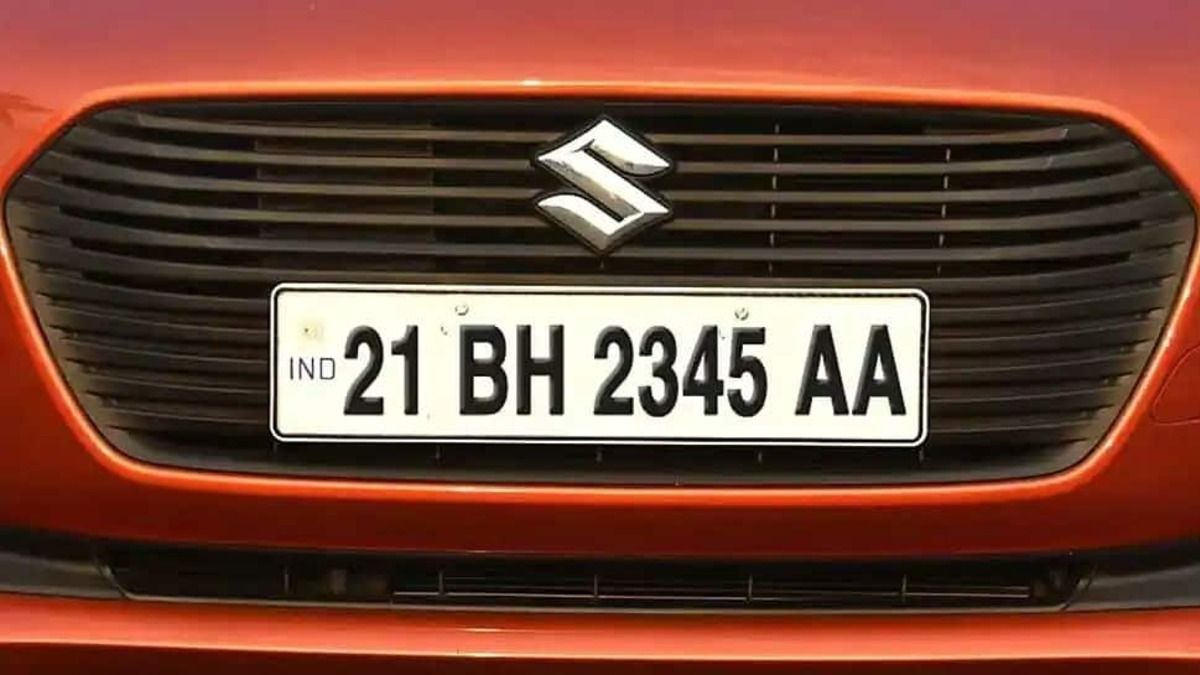

In [33]:
hw_image = show_image('/content/BH-SERIES-NUMBER-PLATES-FEATURED-IMAGE.jpg')

In [32]:
ocr_image(hw_image)

'218H285AA'

In [44]:
!pip install doctr

In [1]:
!pip install python-doctr[torch]

In [3]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 2.7 MB/s eta 0:00:00


In [4]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/94122142 [00:00<?, ?it/s]

DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.


  0%|          | 0/58758994 [00:00<?, ?it/s]

In [6]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
# PDF
doc = DocumentFile.from_pdf("/content/sec_page_5.pdf")
# Analyze
result = model(doc)

DEBUG:tensorflow:Layer lstm_4 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_4 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_4 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_5 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_5 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_5 will use cuDNN kernels when running on GPU.


In [7]:
result

Document(
  (pages): [Page(
    dimensions=(1685, 1190)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='3', confidence=1.0)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Executive', confidence=0.99),
            Word(value='Summary', confidence=1.0),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [
          Line(
            (words): [
              Word(value='The', confidence=1.0),
              Word(value='current', confidence=1.0),
              Word(value='degradation', confidence=1.0),
              Word(value='of', confidence=0.96),
              Word(value='biodiversity', confidence=0.98),
              Word(value='and', confidence=1.0),
              Word(value='soil', confidence=0.99),
              Word(value='fertility', confidence=0.56),
              Word(value='has', confidence=1.0),
              Word(value='led', 

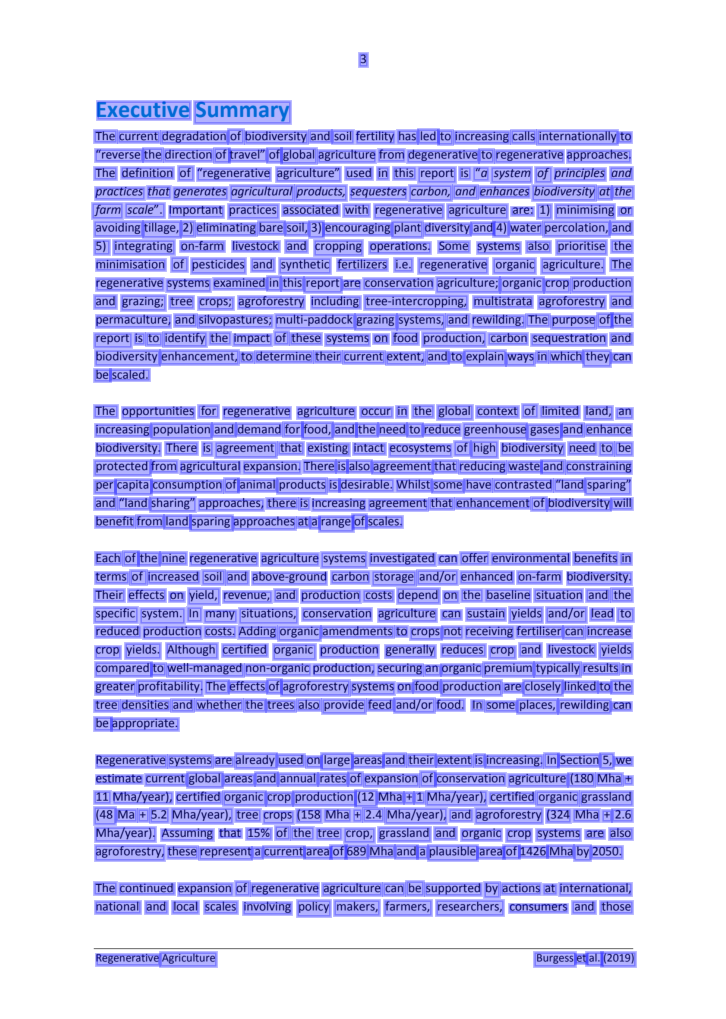

In [8]:
result.show()

In [9]:
json_output = result.export()

In [10]:
json_output

{'pages': [{'page_idx': 0,
   'dimensions': (1685, 1190),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.49308610162815125, 0.0439453125),
      (0.505531118697479, 0.056640625)),
     'lines': [{'geometry': ((0.49308610162815125, 0.0439453125),
        (0.505531118697479, 0.056640625)),
       'words': [{'value': '3',
         'confidence': 0.9999876618385315,
         'geometry': ((0.49308610162815125, 0.0439453125),
          (0.505531118697479, 0.056640625))}]}],
     'artefacts': []},
    {'geometry': ((0.12250114889705882, 0.091796875),
      (0.3962915244222689, 0.11328125)),
     'lines': [{'geometry': ((0.12250114889705882, 0.091796875),
        (0.3962915244222689, 0.11328125)),
       'words': [{'value': 'Executive',
         'confidence': 0.9934213757514954,
         'geometry': ((0.12250114889705882, 0.091796875),
          (0.25386521796218486, 0.109375))},
        {'value': 'Summar

In [16]:
extracted_text = ""
for page in json_output['pages']:
    for block in page['blocks']:
        for line in block['lines']:
            line_text = " ".join([word['value'] for word in line['words']])
            extracted_text += line_text + "\n"

# Remove trailing newline character
extracted_text = extracted_text.strip()

print(extracted_text)

3
Executive Summary
The current degradation of biodiversity and soil fertility has led to increasing calls internationally to
"reverse the direction of travel" of global agriculture from degenerative to regenerative approaches.
The definition of "regenerative agriculture" used in this report is "a system of principles and
practices that generates agricultural products, sequesters carbon, and enhances biodiversity at the
farm scale". Important practices associated with regenerative agriculture are: 1) minimising or
avoiding tillage, 2) eliminating bare soil, 3) encouraging plant diversity and 4) water percolation, and
5) integrating on-farm livestock and cropping operations. Some systems also prioritise the
minimisation of pesticides and synthetic fertilizers i.e. regenerative organic agriculture. The
regenerative systems examined in this report are conservation agriculture; organic crop production
and grazing; tree crops; agroforestry including tree-intercropping, multistrata agrofores